# Jupyter Notebook: Temperaturvorhersage

## Daten Laden
Als erstes laden wir die Datei (jährliche Durchschnittstemperaturen) aus der Datei 'regional_averages_tm_year.txt'. Dieses Mal geben wir uns nicht mit einfachen Arrays zufrieden. Stattdessen speichern wir die Daten direkt in einem DataFrame.

<div class="alert alert-info">
   
**Wichtig:** Wir benötigen in diesem Notebook die Bibliotheken pandas, numpy und scikit-learn.
    
Falls noch nicht geschehen, führe die Befehle 'pip install pandas', 'pip install numpy' und 'pip install scikit-learn' aus.

</div>

<div class="alert alert-info">

**Wichtig:** Die zu lesende Datei muss sich in demselben Verzeichnis befinden wie das Jupyter Notebook!

Falls dies nicht der Fall ist muss die Datei in dasselbe Verzeichnis kopiert oder ein absoluter Pfad angegeben werden. Ein absoluter Pfad wäre zum Beispiel: 'C:/Downloads/regional_averages_tm_year.txt' anstatt 'regional_averages_tm_year.txt'.

</div>

In [1]:
import pandas as pd

df_raw = pd.read_csv('regional_averages_tm_year.txt', delimiter=";", skiprows=1)

df_raw.head()

,Jahr,Jahr.1,Brandenburg/Berlin,Brandenburg,Baden-Wuerttemberg,Bayern,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Niedersachsen/Hamburg/Bremen,Nordrhein-Westfalen,Rheinland-Pfalz,Schleswig-Holstein,Saarland,Sachsen,Sachsen-Anhalt,Thueringen/Sachsen-Anhalt,Thueringen,Deutschland,Unnamed: 19
0,1881,year,7.55,7.54,7.66,6.61,7.49,6.96,7.54,7.54,8.14,7.97,7.12,8.28,6.71,7.46,7.11,6.66,7.31,NaN
1,1882,year,8.99,8.97,8.08,7.33,8.25,8.54,8.88,8.88,9.03,8.55,8.78,8.79,8.12,8.81,8.35,7.77,8.34,NaN
2,1883,year,8.42,8.41,7.77,6.85,7.96,7.95,8.39,8.39,8.71,8.26,8.18,8.51,7.46,8.32,7.87,7.31,7.88,NaN
3,1884,year,9.11,9.10,8.44,7.52,8.58,8.73,9.09,9.10,9.39,8.94,8.86,9.18,8.21,8.94,8.47,7.89,8.57,NaN
4,1885,year,8.40,8.39,7.82,7.04,7.66,7.68,7.94,7.94,8.31,8.01,7.62,8.30,7.73,8.07,7.67,7.16,7.74,NaN


Wir beschränken uns diesmal auf die Temperatur von (Gesamt-)Deutschland. Wir benennen die Jahreszahl mit x und die Temperatur für Deutschland mit y.

In [2]:
df = pd.DataFrame(
    {'x': df_raw['Jahr'],
     'y': df_raw['Deutschland']}
)

df.head()

,x,y
0,1881,7.31
1,1882,8.34
2,1883,7.88
3,1884,8.57
4,1885,7.74


## Berechne lineare Regression
Nun berechnen wir anhand der Daten x und y ein lineares Modell, dass den Zusammenhang von Jahreszahl und Temperatur darstellt.

### manuelle Berechnung
Wir können a und b manuell berechnen. Mithilfe von pandas und numpy funktioniert das innerhalb weniger Zeilen. Für die Berechnung benötigen wir Mittelwert, Varianz von x und Covarianz von x und y. Auf die mathematischen Einzelheiten gehen wir an dieser Stelle nicht näher ein.

In [3]:
import numpy as np

x_mittel = np.mean(df['x'])
y_mittel = np.mean(df['y'])

df['xy_cov'] = (df['x'] - x_mittel) * (df['y'] - y_mittel)
df['x_var'] = (df['x'] - x_mittel)**2

b = df['xy_cov'].sum() / df['x_var'].sum()
a = y_mittel - (b * x_mittel)
print(f'a = {a}')
print(f'b = {b}')

a = -14.641467625899281
b = 0.011798276880015746


Anhand von a und b können wir nun eine Abschätzung von y berechnen. Zunächst für alle Werte von x und dann für ein bestimmtes Jahr.

In [4]:
y_schaetzung = b*df['x'] + a

jahr_vorhersage = 2020
y_schaetzung_bestimmtes_jahr = b*jahr_vorhersage + a
print ("Vorhersage für " + str(jahr_vorhersage) + ": " + str(y_schaetzung_bestimmtes_jahr))


Vorhersage für 2020: 9.191051671732527


### Ausgabe Ergebnisse
Mit matplotlib können wir die tatsächlichen Werte y und die geschätzten Werte y_schaetzung in einer Grafik darstellen.

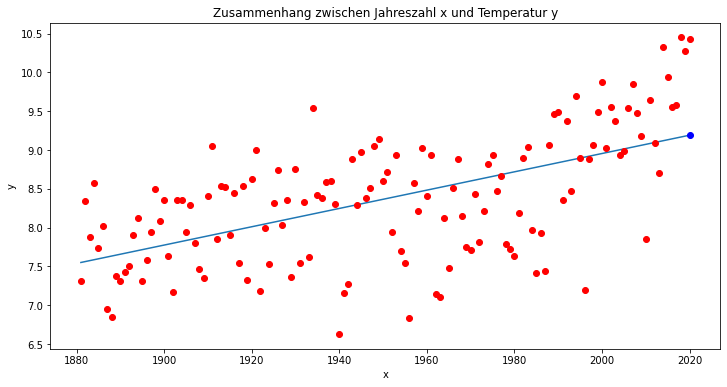

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['x'], y_schaetzung) # mithilfe der linearen Regression bestimmte Gerade
plt.plot(df['x'], df['y'], 'ro') # Scatter Plot der tatsächlichen Werte
plt.plot(jahr_vorhersage, y_schaetzung_bestimmtes_jahr, 'bo') # vorhergesagter Datenpunkt
plt.title('Zusammenhang zwischen Jahreszahl x und Temperatur y')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### Berechnung mithilfe von scikit-learn
Noch einfacher lassen sich Verfahren wie die lineare Regression mithilfe von scikit-learn durchführen. Das erfolgt in drei Schritte: 

1. Modell initialisieren
2. Modell fitten (engl. anpassen)
3. Modell auswerten

Beachte, dass auch diesmal wieder die Variablen a und b bestimmt werden. Nur tun wir dies nicht selbst. Stattdessen werden sie während dem Fitten des Modells durch die scikit-learn Bibliothek berechnet. Wir können uns a und b aber ausgeben lassen und kontrollieren ob dieselbe Werte angezeigt werden wie in unserer manuellen Berechnung oben.

In [6]:
from sklearn.linear_model import LinearRegression

x = np.array(df['x'])
X = np.array(df['x']).reshape(-1, 1)
y = np.array(df['y'])

# 1. Modell initialisieren
lm = LinearRegression() 

# 2. Modell fitten
#model = lm.fit(x,y)
model = lm.fit(X, y) 

print(f'a = {model.intercept_}')
print(f'b = {model.coef_}')

a = -14.641467625899274
b = [0.01179828]


Die Auswertung des Modells erfolgt mit der predict-Methode. Welche Temperatur wird für 2020 vorhergesagt? Deckt sich die Vorhersage mit unserer manuellen Berechnung beziehungsweise dem Plot?

In [7]:
# 3. Modell auswerten
model.predict([[jahr_vorhersage]])

array([9.19105167])

<div class="alert alert-info">

**Hinweis:** Für das Fitten des Modells erwartet die scikit-learn Bibliothek eine Matrix X und einen Vektor y als Eingabe.
    
Wenn du den Code selbst geschribeben hättest, hättest du reshape() verwendet? Entferne das Kommentarzeichen aus der Zeile "model = lm.fit(x,y)" und versuche was passiert, wenn du den Vektor x direkt an die fit-Methode übergibst.
    
Dass die fit-Methode X als Matrix erwartet ist verständlich, da ja mehr als nur eine einzige Einflussgröße existieren kann. Sollte man dennoch den Wert x als Parameter übergeben, erhält man bei der Ausführung einen ValueError. Solche Fehler, denen eine kleine Abweichung im Datenformat zugrunde liegt sind sehr üblich und kosten den Entwickler oder Data Scientist oft viel Zeit. In diesem Fall ist die Behebung des Problems glücklicherweise direkt in der Fehlermeldung angegeben. In anderen Fällen empfiehlt es sich den Fehler zu googeln, bei einschlägigen Seite wie zum Beispiel Stakeoverflow zu suchen oder auf der Dokumentationsseite der verwendeten Bibliothek. In diesem Fall ist das: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html.

</div>

### Alernative Lösung mit Regression in 2 Bereichen
Eine Extrapolation ist mit großen Unsicherheiten verbunden. Wenn überhaupt ist dieses Vorgehen nur erlaubt, wenn ein Experte den vorhergesagten Verlauf auch außerhalb des bekannten Bereichs fachlich begründen kann. Alternative Ergebnisse für dasselben Vorgehen (lineare Regression) entstehen, wenn man einen anderen Datenbereich zugrunde legt. Unten wird der Datenbereich aufgeteilt und zwei Geraden separat bestimmt.

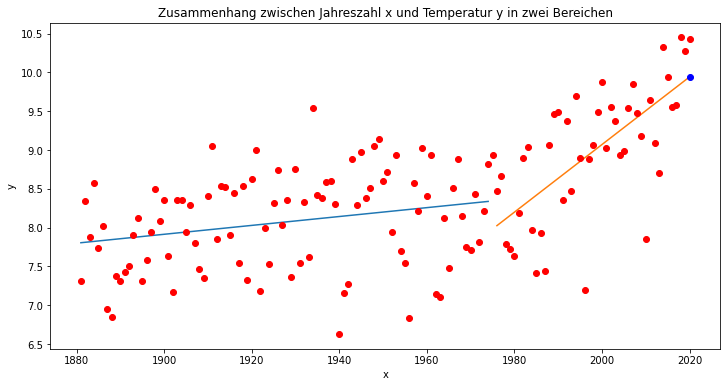

In [8]:
x_1 = np.array(x[0:94])
X_1 = np.array(x[0:94]).reshape(-1, 1)
y_1 = np.array(y[0:94])
model_1 = lm.fit(X_1, y_1) 
y_1_vorhersage = model_1.predict(X_1)

x_2 = np.array(x[95:])
X_2 = np.array(x[95:]).reshape(-1, 1)
y_2 = np.array(y[95:])
model_2 = lm.fit(X_2, y_2) 
y_2_vorhersage = model_2.predict(X_2)
model_2.predict([[jahr_vorhersage]])

#Plot der tatsächlichen Daten und beider Geraden
plt.figure(figsize=(12, 6))
plt.plot(x_1, y_1_vorhersage) # Gerade im ersten Bereich
plt.plot(x_2, y_2_vorhersage) # Gerade im zweiten Bereich
plt.plot(df['x'], df['y'], 'ro') # Scatter Plot der tatsächlichen Werte
plt.plot(jahr_vorhersage, model_2.predict([[jahr_vorhersage]]), 'bo') # vorhergesagter Datenpunkt
plt.title('Zusammenhang zwischen Jahreszahl x und Temperatur y in zwei Bereichen')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Nicht-lineare Regression
Woher wissen wir, dass eine Gerade eine gute Vorhersage ermöglicht? Alleine auf Basis der Daten wissen wir es überhaupt nicht.
Anstatt der linearen Regression gibt es noch viele weitere Möglichkeiten einen Zusammenhang zwischen Einflussgrößen und Zielgröße herzustellen. Ein weitere relativ einfache Darstellung ist die eines Polynoms. Als ein weiteres Beispiel fitten wir ein Polynom dritten Grades an die bekannten Daten.

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X, y)
model.predict([[2020]])

array([10.10558467])

Wiederum plotten wir die tatsächliche und vorhergesagte Temperatur.

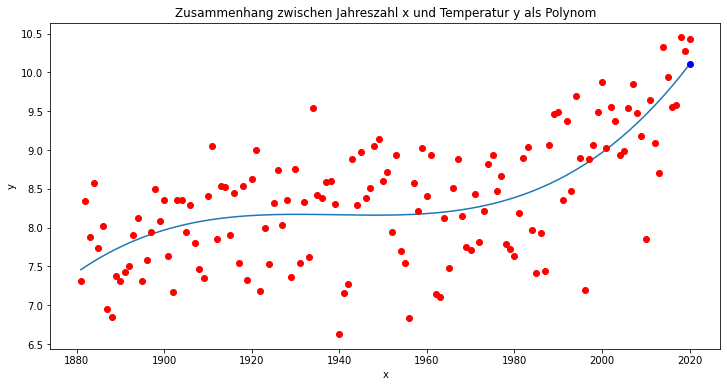

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(x, model.predict(X))
plt.plot(x, y, 'ro') 
plt.title('Zusammenhang zwischen Jahreszahl x und Temperatur y als Polynom')
plt.plot(jahr_vorhersage, model.predict([[jahr_vorhersage]]), 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Lineare Regression auf Basis von CO2-Daten
Wir laden eine neue Datenquelle, die sowohl Temperatur als auch CO2 Daten enthält.

In [11]:
df_co2 = pd.read_csv('co2_temperatur_deutschland.csv', delimiter=";")

df_co2.head()

,Jahr,Temperatur Deutschland,CO2 Konzentration
0,1881,7.31,285.91
1,1882,8.34,284.45
2,1883,7.88,284.15
3,1884,8.57,283.65
4,1885,7.74,281.58


Wiederum führen wir eine lineare Regression durch. Dieses Mal wählen wiederum die Temperatur als Zielgröße, aber als Einflussgröße die CO2 Konzentration.

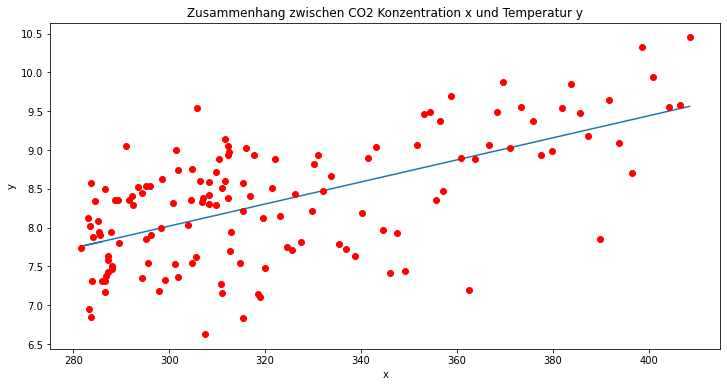

In [12]:
x = np.array(df_co2['CO2 Konzentration'])
X = np.array(df_co2['CO2 Konzentration']).reshape(-1, 1)
y = np.array(df_co2['Temperatur Deutschland'])

model = lm.fit(X, y) 
y_vorhersage = model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(x, y_vorhersage) # Gerade aus linearer Regression
plt.plot(x, y, 'ro') # Scatter Plot der tatsächlichen Werte
plt.title('Zusammenhang zwischen CO2 Konzentration x und Temperatur y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Welche Temperatur sagt unser Modell für den x-Wert 600 hervor?

Wie sähe das Ergebnis für eine nicht-lineare Interpolation aus?